# MNIST Classification with TensorFlow

This notebook demonstrates how to build, train, and evaluate a simple neural network to classify handwritten digits from the MNIST dataset using TensorFlow and Keras.

In [41]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import matplotlib.pyplot as plt

In [42]:
# Load the MNIST dataset
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

In [43]:
# Display the shape of the dataset
print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


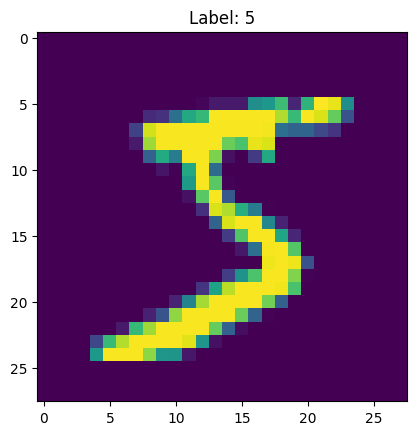

In [44]:
# Visualize the first training image
plt.imshow(X_train[0])
plt.title(f'Label: {y_train[0]}')
plt.show()

In [45]:
# Normalize the dataset to the range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [46]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
## Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
#Train the model
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8318 - loss: 0.5521 - val_accuracy: 0.9542 - val_loss: 0.1571
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9526 - loss: 0.1588 - val_accuracy: 0.9671 - val_loss: 0.1111
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9660 - loss: 0.1097 - val_accuracy: 0.9718 - val_loss: 0.0961
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9688 - loss: 0.0953 - val_accuracy: 0.9705 - val_loss: 0.1052
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9739 - loss: 0.0819 - val_accuracy: 0.9724 - val_loss: 0.0882
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9767 - loss: 0.0737 - val_accuracy: 0.9753 - val_loss: 0.0833
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9810 - loss: 0.0607 - val_accuracy: 0.9741 - val_loss: 0.0880
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9808 - loss: 0.0576 

In [50]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred.argmax(axis=1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.9759
